In [1]:
# Step 1: imports
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import joblib

In [2]:
# Step 2: Load the dataset
df = pd.read_csv("C:\\Users\\nikes\\Downloads\\Archeological_sites\\india_archaeo_dataset_500.csv")

# Display first 5 rows
print("✅ Dataset loaded successfully.\n")
print(df.head())

# Basic info
print("\n📊 Dataset Info:")
print(df.info())

# Check for missing values
print("\n🧩 Missing values in each column:")
print(df.isnull().sum())

✅ Dataset loaded successfully.

    latitude  longitude    elevation  distance_to_river  vegetation_index  \
0  30.505616  92.246274  1422.687218          43.310571          0.694095   
1  27.335283  91.408919  1155.841244          27.980148          0.797369   
2  24.488617  68.287820  1376.925645          36.708456          0.557940   
3  21.631322  82.469399  1512.285092          27.793791          0.623935   
4  20.329441  96.010495   918.306018          29.565808          0.363520   

  soil_type  soil_type_encoded  is_archaeological_site  
0       Red                  1                       0  
1       Red                  1                       0  
2       Red                  1                       0  
3  Alluvial                  0                       0  
4     Black                  3                       0  

📊 Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column                  Non-Null Coun

In [3]:
# Step 3: Feature selection
X = df[['latitude', 'longitude', 'elevation', 'distance_to_river', 'vegetation_index', 'soil_type_encoded']]
y = df['is_archaeological_site']

# Split into training and testing sets (80% / 20%)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("✅ Data split completed.")
print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])

✅ Data split completed.
Training samples: 400
Testing samples: 100


In [4]:
# Step 4: Scale the features
scaler = StandardScaler()

# Fit on training data and transform both training and test sets
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

print("✅ Feature scaling completed.")
print("Mean of scaled training data (should be near 0):", np.mean(X_train_scaled))
print("Std of scaled training data (should be near 1):", np.std(X_train_scaled))

✅ Feature scaling completed.
Mean of scaled training data (should be near 0): -7.66053886991358e-17
Std of scaled training data (should be near 1): 0.9999999999999999


In [5]:
# Step 5: Train the Random Forest model
model = RandomForestClassifier(
    n_estimators=200,   # number of trees
    random_state=42,    # ensures reproducibility
    max_depth=None,     # trees can grow fully
    n_jobs=-1           # use all CPU cores for faster training
)

model.fit(X_train_scaled, y_train)

RandomForestClassifier(n_estimators=200, n_jobs=-1, random_state=42)

In [6]:
# Step: Manual prediction
def predict_site(lat, lon, elevation, dist_river, veg_index, soil_encoded):
    # Create input array
    sample = np.array([[lat, lon, elevation, dist_river, veg_index, soil_encoded]])
    
    # Scale input using previously fitted scaler
    sample_scaled = scaler.transform(sample)
    
    # Predict
    pred = model.predict(sample_scaled)[0]
    
    # Return result
    return "✅ Likely Archaeological Site" if pred == 1 else "❌ Not Likely"

# Example usage
latitude = 26.9124       # Jaipur
longitude = 75.7873
elevation = 431.2
distance_to_river = 6.5
vegetation_index = 0.68
soil_encoded = 0          # Alluvial

result = predict_site(latitude, longitude, elevation, distance_to_river, vegetation_index, soil_encoded)
print("Prediction:", result)

Prediction: ✅ Likely Archaeological Site


c:\Users\nikes\anaconda3\envs\TensorFlow_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [8]:
# Interactive prediction using user input
def interactive_prediction():
    print("=== Archaeological Site Prediction (India) ===")
    
    # Ask for user inputs
    latitude = float(input("Enter latitude (8 to 37): "))
    longitude = float(input("Enter longitude (68 to 97): "))
    elevation = float(input("Enter elevation in meters: "))
    distance_to_river = float(input("Enter distance to nearest river in km: "))
    vegetation_index = float(input("Enter vegetation index (0 to 1): "))
    
    print("\nSoil types: 0: Alluvial, 1: Red, 2: Laterite, 3: Black, 4: Arid")
    soil_type_encoded = int(input("Enter soil type code (0-4): "))
    
    # Create input array
    sample = np.array([[latitude, longitude, elevation, distance_to_river, vegetation_index, soil_type_encoded]])
    
    # Scale input
    sample_scaled = scaler.transform(sample)
    
    # Predict
    pred = model.predict(sample_scaled)[0]
    
    # Output result
    result = "✅ Likely Archaeological Site" if pred == 1 else "❌ Not Likely"
    print("\nPrediction Result:", result)

# Run the interactive prompt
interactive_prediction()

=== Archaeological Site Prediction (India) ===

Soil types: 0: Alluvial, 1: Red, 2: Laterite, 3: Black, 4: Arid

Prediction Result: ✅ Likely Archaeological Site


c:\Users\nikes\anaconda3\envs\TensorFlow_env\lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


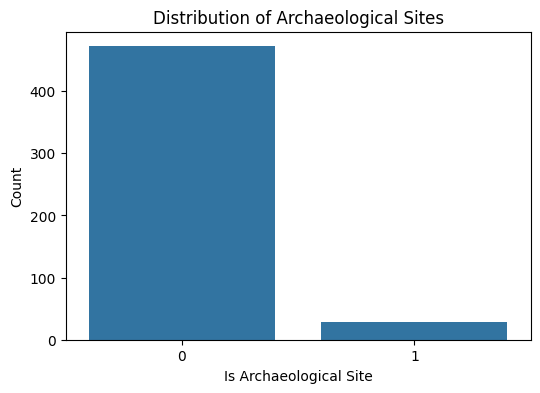

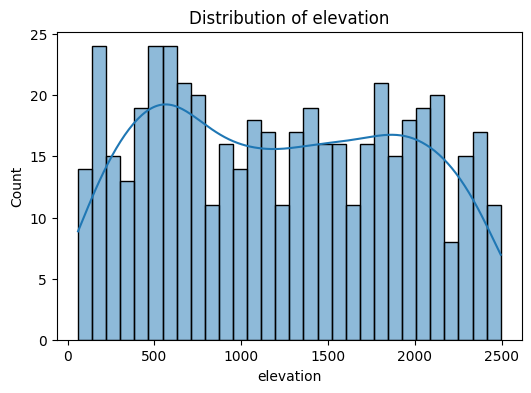

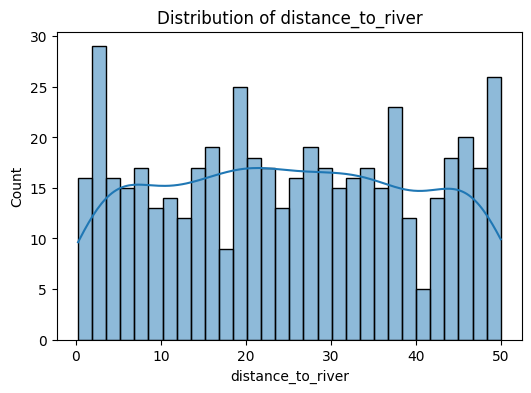

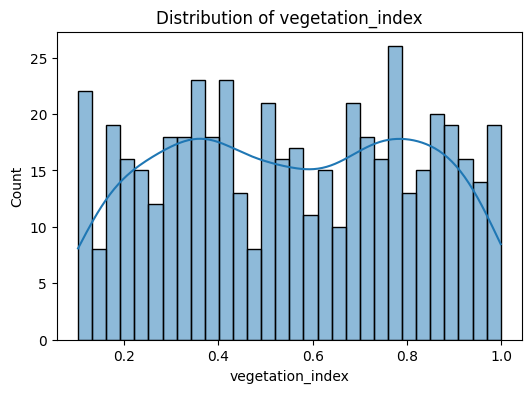

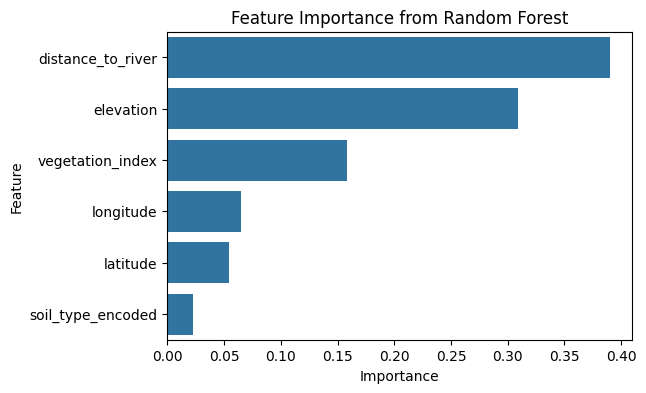

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1️⃣ Target variable distribution
plt.figure(figsize=(6,4))
sns.countplot(x='is_archaeological_site', data=df)
plt.title("Distribution of Archaeological Sites")
plt.xlabel("Is Archaeological Site")
plt.ylabel("Count")
plt.show()

# 2️⃣ Feature distributions
features_to_plot = ['elevation', 'distance_to_river', 'vegetation_index']
for feature in features_to_plot:
    plt.figure(figsize=(6,4))
    sns.histplot(df[feature], bins=30, kde=True)
    plt.title(f"Distribution of {feature}")
    plt.xlabel(feature)
    plt.ylabel("Count")
    plt.show()

# 3️⃣ Feature importance from Random Forest
importances = model.feature_importances_
feature_names = X.columns
feat_imp = pd.Series(importances, index=feature_names).sort_values(ascending=False)

plt.figure(figsize=(6,4))
sns.barplot(x=feat_imp.values, y=feat_imp.index)
plt.title("Feature Importance from Random Forest")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

In [10]:
import joblib

# Save Random Forest model
joblib.dump(model, "archaeo_rf_model.pkl")

# Save StandardScaler
joblib.dump(scaler, "archaeo_scaler.pkl")

print("✅ Model and scaler saved successfully as .pkl files!")

✅ Model and scaler saved successfully as .pkl files!


✅ Accuracy on test set: 0.9900

📊 Classification Report:
              precision    recall  f1-score   support

           0       0.99      1.00      0.99        93
           1       1.00      0.86      0.92         7

    accuracy                           0.99       100
   macro avg       0.99      0.93      0.96       100
weighted avg       0.99      0.99      0.99       100


🧩 Confusion Matrix:
[[93  0]
 [ 1  6]]


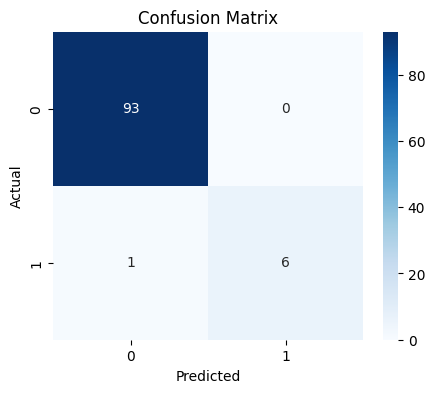

In [13]:
# Step: Evaluate model
y_pred = model.predict(X_test_scaled)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"✅ Accuracy on test set: {accuracy:.4f}")

# Detailed classification report
print("\n📊 Classification Report:")
print(classification_report(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)
print("\n🧩 Confusion Matrix:")
print(cm)

# Optional: Plot confusion matrix
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()